# Papirbro

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sms
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
run DOEfunksjoner.ipynb 

## DEL 1

In [3]:
X = tofaktorDOE(k=3)
print(X)

    x1   x2   x3
0 -1.0 -1.0 -1.0
1  1.0 -1.0 -1.0
2 -1.0  1.0 -1.0
3  1.0  1.0 -1.0
4 -1.0 -1.0  1.0
5  1.0 -1.0  1.0
6 -1.0  1.0  1.0
7  1.0  1.0  1.0


In [4]:
y1 = [8.7, 17.4, 0, 8.7, 8.7, 30.45, 4.35, 13.05]
y2 = [4.35, 17.4, 4.35, 8.7, 8.7, 34.8, 4.35, 21.75]

In [5]:
tab = np.column_stack([X, y1,y2])
colnames = ["x1", "x2","x3", "y1","y2"]
df = pd.DataFrame(tab,columns=colnames)
print(df)

    x1   x2   x3     y1     y2
0 -1.0 -1.0 -1.0   8.70   4.35
1  1.0 -1.0 -1.0  17.40  17.40
2 -1.0  1.0 -1.0   0.00   4.35
3  1.0  1.0 -1.0   8.70   8.70
4 -1.0 -1.0  1.0   8.70   8.70
5  1.0 -1.0  1.0  30.45  34.80
6 -1.0  1.0  1.0   4.35   4.35
7  1.0  1.0  1.0  13.05  21.75


In [6]:
colnames = ["x1", "x2","x3", "y"]
rep1 = pd.DataFrame(np.column_stack([X, y1]),columns=colnames)
rep2 = pd.DataFrame(np.column_stack([X, y2]),columns=colnames)

df = pd.concat([rep1,rep2])

print(df)

    x1   x2   x3      y
0 -1.0 -1.0 -1.0   8.70
1  1.0 -1.0 -1.0  17.40
2 -1.0  1.0 -1.0   0.00
3  1.0  1.0 -1.0   8.70
4 -1.0 -1.0  1.0   8.70
5  1.0 -1.0  1.0  30.45
6 -1.0  1.0  1.0   4.35
7  1.0  1.0  1.0  13.05
0 -1.0 -1.0 -1.0   4.35
1  1.0 -1.0 -1.0  17.40
2 -1.0  1.0 -1.0   4.35
3  1.0  1.0 -1.0   8.70
4 -1.0 -1.0  1.0   8.70
5  1.0 -1.0  1.0  34.80
6 -1.0  1.0  1.0   4.35
7  1.0  1.0  1.0  21.75


In [7]:
modell = smf.ols('y~x1+x2+x3 + x1*x2 + x2*x3 + x1*x3', data=df).fit()
print(modell.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     26.72
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           3.01e-05
Time:                        11:16:01   Log-Likelihood:                -35.260
No. Observations:                  16   AIC:                             84.52
Df Residuals:                       9   BIC:                             89.93
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2344      0.731     16.745      0.0

/Users/theabj/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


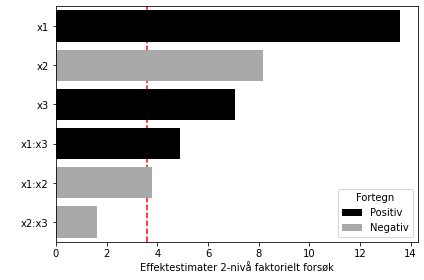

In [8]:
DOEparetoplott(modell)

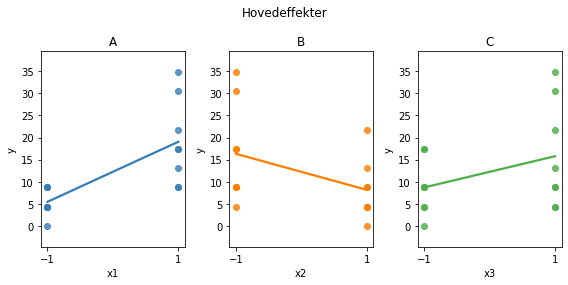

In [9]:
hovedeffektsplott(data = df, k = 3, observasjoner = True)

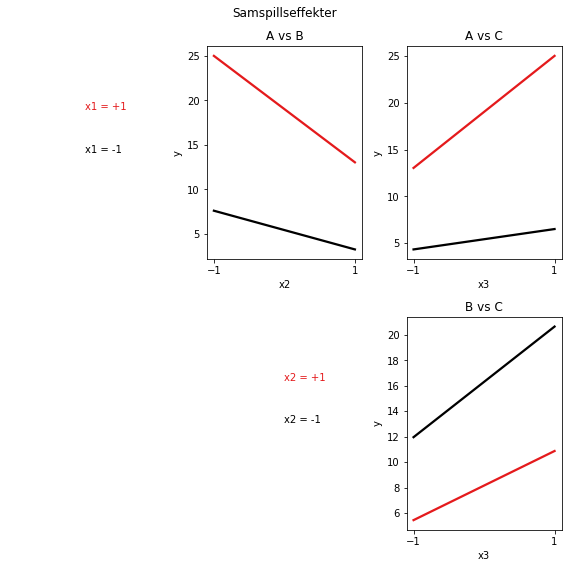

In [10]:
samspillsplott(data = df, k = 3)

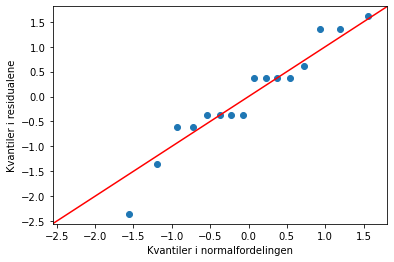

In [11]:
sms.qqplot(modell.resid,line='45',fit=True)
plt.ylabel("Kvantiler i residualene")
plt.xlabel("Kvantiler i normalfordelingen")
plt.show()

## DEL 2

In [12]:
varY = modell.mse_resid
sdY = np.sqrt(varY)
print(round(sdY,2))

2.92


In [13]:
modell.mse_resid

8.541406249999998

In [14]:
modell.predict()

array([ 5.709375, 18.215625,  2.990625,  7.884375,  9.515625, 31.809375,
        3.534375, 18.215625,  5.709375, 18.215625,  2.990625,  7.884375,
        9.515625, 31.809375,  3.534375, 18.215625])

## Stokastisk simulering
Her simulerer jeg 100 broer fra en produksjon som er under kontroll (dere skal ikke gjøre dette i prosjektet, dette er bare for å visulisere hvordan en slik prosess ser ut)

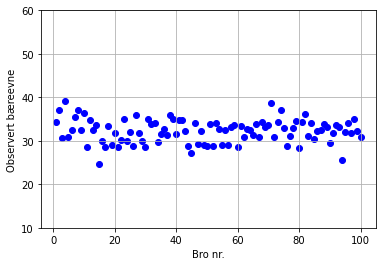

In [15]:
mean = 31.81
std_dev = 2.92
antall_broer = 100
bæreevne = np.zeros(antall_broer)

for i in range(antall_broer):
    bæreevne[i] = np.random.normal(mean, std_dev)

bro_nr = np.arange(1, antall_broer + 1)

plt.scatter(bro_nr, bæreevne, marker='o',color='b')
plt.ylim(10,60); plt.xlabel("Bro nr."); plt.ylabel("Observert bæreevne")
plt.grid()
plt.show()

Her simulerer jeg 100 broer fra en produksjon som ikke er under kontroll (dere skal ikke gjøre dette i prosjektet, dette er bare for å visulisere hvordan en slik prosess ser ut). Her endrer forventningsverdien seg med $- 0.2\cdot \sigma$ for hver femte bro som produseres

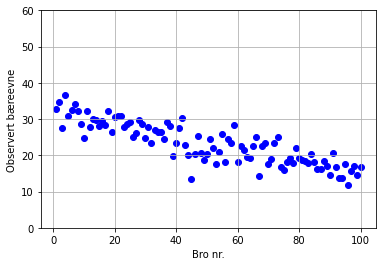

In [16]:
mean = 31.81
std_dev = 2.92
antall_broer = 100
bæreevne = np.zeros(antall_broer)

for i in range(antall_broer):
    if (i + 1) % 5 == 0:
        mean -= 0.3 * std_dev
    bæreevne[i] = np.random.normal(mean, std_dev)

bro_nr = np.arange(1, antall_broer + 1)

plt.scatter(bro_nr, bæreevne, marker='o',  color='b')
plt.ylim(0,60); plt.xlabel("Bro nr."); plt.ylabel("Observert bæreevne")
plt.grid()
plt.show()

Her simulerer jeg 100 broer fra en produksjon som ikke er under kontroll (dere skal ikke gjøre dette i prosjektet, dette er bare for å visulisere hvordan en slik prosess ser ut). Her endrer standardavviket seg med $+ 0.5$ for hver femte bro som produseres

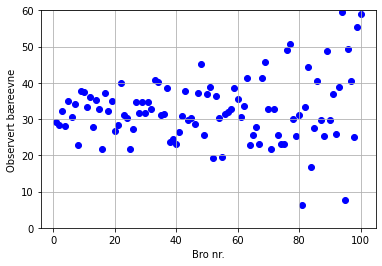

In [17]:
mean = 31.81
std_dev = 2.92
antall_broer = 100
bæreevne = np.zeros(antall_broer)

for i in range(antall_broer):
    if (i + 1) % 5 == 0:
        std_dev += 0.5
    bæreevne[i] = np.random.normal(mean, std_dev)

bro_nr = np.arange(1, antall_broer + 1)

plt.scatter(bro_nr, bæreevne, marker='o', color='b')
plt.ylim(0,60); plt.xlabel("Bro nr."); plt.ylabel("Observert bæreevne")
plt.grid()
plt.show()

### Kontrollgrenser og stikkprøver
MERK: Dere skal gjøre noe som ligner på dette i del 2 av prosjektet, men dere må gjøre noen endringer i koden!

In [18]:
mean = 31.81
std_dev = 2.92

n_stikkprøve = 5
cu_mean = mean + 3*std_dev/np.sqrt(n_stikkprøve)
cl_mean = mean - 3*std_dev/np.sqrt(n_stikkprøve)

print(cu_mean)
print(cl_mean)

cu_std = std_dev*np.sqrt(stats.chi2.ppf(1-0.002,(n_stikkprøve-1))/(n_stikkprøve-1))
cl_std = std_dev*np.sqrt(stats.chi2.ppf(0.002,(n_stikkprøve-1))/(n_stikkprøve-1))
print(cu_std)
print(cl_std)


35.72759109657963
27.892408903420367
6.006220356445241
0.5248648521370621


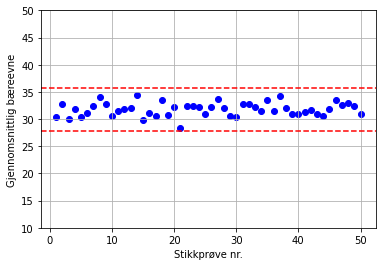

In [19]:
stikkprøver = 50

snitt_bæreevne = np.zeros(stikkprøver)
std_bæreevne = np.zeros(stikkprøver)


for i in range(stikkprøver):
    utvalg = np.random.normal(mean, std_dev, n_stikkprøve)
    snitt_bæreevne[i] = np.mean(utvalg)
    std_bæreevne[i] = np.std(utvalg, ddof=1)


stikkprøve_nr = np.arange(1, stikkprøver + 1)

plt.scatter(stikkprøve_nr, snitt_bæreevne, marker='o', color='b')
plt.ylim(10,50); plt.xlabel("Stikkprøve nr."); plt.ylabel("Gjennomsnittlig bæreevne")
plt.axhline(y=cu_mean, color='r', linestyle='--')
plt.axhline(y=cl_mean, color='r', linestyle='--')
plt.grid()
plt.show()

Over ser vi en simuleringer av stikkprøver basert på 5 broer av gangen. Vi har plottet oververt gjennomsnittlig bæreevne for de fem broene i hver stikkprøve. Prosessen er under kontroll. Kontrollgrensene er tegnet som røde linjer. Dette er et Shewarts $\bar{x}$-diagram.

Sammenligne gjerne med figuren som viste simulering av 100 broer. Ser dere at variasjonen er mye lavere nå som vi ser på fem broer av gangen, i stedet for en og en?

Under ser du et $s$-diagram for standardavviket i kontrollprøvene. Her ser vi hvordan empirisk standardavvik i hver stikkprøve fordeler seg når prosessen er under kontroll. Kontrollgrensene for standardavviket er tegnet som røde linjer.

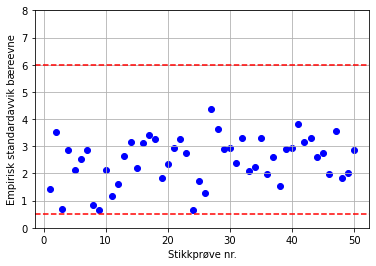

In [20]:
plt.scatter(stikkprøve_nr, std_bæreevne, marker='o', color='b')
plt.ylim(0,8); plt.xlabel("Stikkprøve nr."); plt.ylabel("Empirisk standardavvik bæreevne")
plt.axhline(y=cu_std, color='r', linestyle='--')
plt.axhline(y=cl_std, color='r', linestyle='--')
plt.grid()
plt.show()

### Stokastisk simulering av stikkprøver når parametere endrer seg
I simuleringen under har jeg kodet inn at forventningsverdien endrer seg med $+0.5$ for hver femte stikkprøve. Jeg har også kodet inn at standardavviket endrer seg med $+0.1$ for hver femte stikkprøve. Vi observerer hva som skjer i $\bar{x}$- og $s$-diagrammer. 

*MERK!* Dere skal ikke gjøre akkurat det samme i prosjektet, tilpass simuleringer til oppgavebeskrivelsen.

Kjør gjerne simuleringen flere ganger for å se hva som skjer. Når går alarmen? Ser vi utslagene først i $\bar{x}$-diagrammet eller ${s}$-diagrammet? (dette kan endre seg mellom simuleringer)

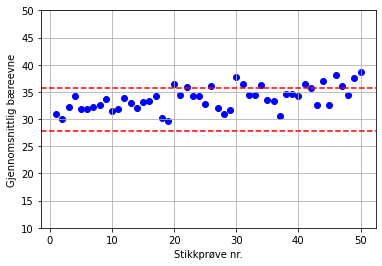

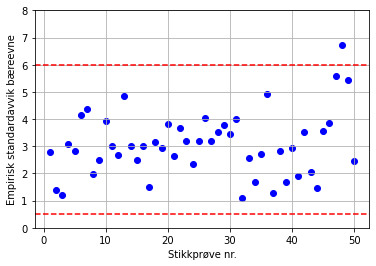

In [21]:
stikkprøver = 50

mean = 31.81
std_dev = 2.92

snitt_bæreevne = np.zeros(stikkprøver)
std_bæreevne = np.zeros(stikkprøver)

for i in range(stikkprøver):
    if (i + 1) % 5 == 0:
        mean += 0.5
        std_dev += 0.1
    utvalg = np.random.normal(mean, std_dev, n_stikkprøve)
    snitt_bæreevne[i] = np.mean(utvalg)
    std_bæreevne[i] = np.std(utvalg, ddof=1)


stikkprøve_nr = np.arange(1, stikkprøver + 1)

plt.scatter(stikkprøve_nr, snitt_bæreevne, marker='o', color='b')
plt.ylim(10,50); plt.xlabel("Stikkprøve nr."); plt.ylabel("Gjennomsnittlig bæreevne")
plt.axhline(y=cu_mean, color='r', linestyle='--')
plt.axhline(y=cl_mean, color='r', linestyle='--')
plt.grid()
plt.show()

plt.scatter(stikkprøve_nr, std_bæreevne, marker='o', color='b')
plt.ylim(0,8); plt.xlabel("Stikkprøve nr."); plt.ylabel("Empirisk standardavvik bæreevne")
plt.axhline(y=cu_std, color='r', linestyle='--')
plt.axhline(y=cl_std, color='r', linestyle='--')
plt.grid()
plt.show()